In [2]:
import numpy as np
from datetime import datetime
from andi_datasets.datasets_challenge import challenge_theory_dataset
from andi_datasets.datasets_theory import datasets_theory
from sklearn.model_selection import train_test_split
from tensorflow import keras as kr
from keras import models, layers ,Sequential
from keras.layers import Dense,Conv1D,Flatten,BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.layers import Dropout

/Users/fredyvelasquez/Personales/Repositorios/TFM/TFM/AmbienteTFM/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/fredyvelasquez/Personales/Repositorios/TFM/TFM/AmbienteTFM/lib/python3.10/site-packages/andi_datasets/utils_videos.py:19: UserWarning: Deeptrack is currently not installed. Install if needed using pip install deeptrack.
  warnings.warn('Deeptrack is currently not installed. Install if needed using pip install deeptrack.')
2023-12-26 20:06:37.932030: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Generamos el data set con 10,000 registros, unicamente para el task 2, con 1 dimension

In [10]:

print("inicio=", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
X1,Y1, X2, Y2,X3,Y3=challenge_theory_dataset(min_T = 199, max_T = 200,N = 10000,dimensions = 1,tasks = 2,save_dataset = True)
print("Final=", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

inicio= 27/10/2023 21:54:06
Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.


/Users/fredyvelasquez/Personales/Repositorios/TFM/TFM/AmbienteTFM/lib/python3.10/site-packages/andi_datasets/models_theory.py:95: RuntimeWarning: overflow encountered in power
  dt = (1-np.random.rand(T))**(-1/sigma)


Final= 27/10/2023 21:54:19


El data Set ya se encuentra guardado en nuestro computador, esto nos evita estar generando un data set cada vez que ejecutemos nuestro scrip, y solo tenemos que leer la informacion que ya esta almacenada, esto lo hacemos con el parametro "load_dataset"

In [3]:

print("inicio=", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
X1,Y1, X2, Y2,X3,Y3=challenge_theory_dataset(N = 10000,dimensions = 1,tasks = 2,load_dataset = True)
print("Final=", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

inicio= 26/12/2023 20:06:51
Creating a dataset for task(s) 2 and dimension(s) 1.
Final= 26/12/2023 20:06:52


In [112]:
#for x in range(0,30):
#    print('Dim Trayectorioa Test:'+str(x)+' '+str(len(X2[0][x])))


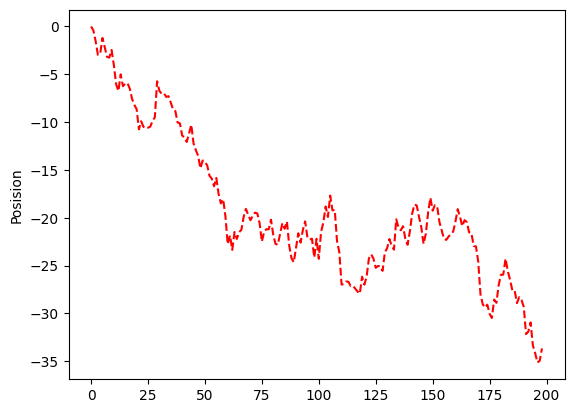

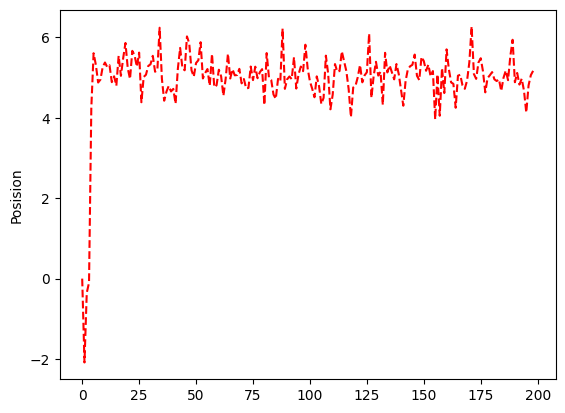

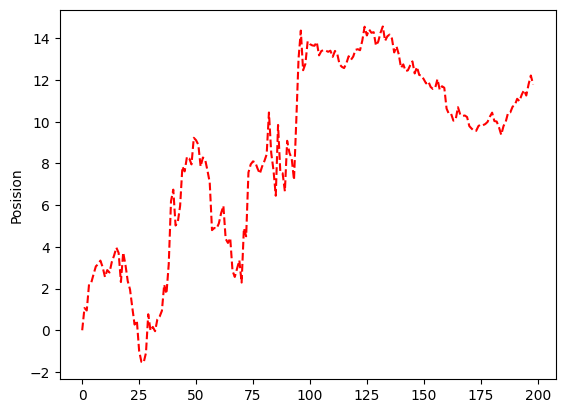

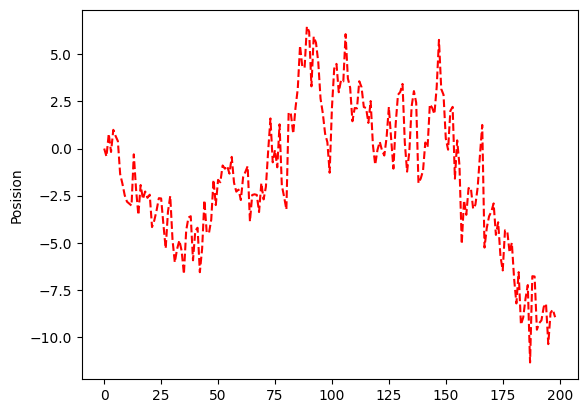

<Figure size 640x480 with 0 Axes>

In [4]:
for x in range(1,5):
    Posit = range(0,len(X2[0][x]))
    plt.plot ( Posit,X2[0][x], 'r--' ,label=str(x) )
    plt.ylabel('Posision')
    #plt.legend(AD().avail_models_name[x].upper())
    #AD().avail_models_name[int(l)].upper(), c = 'C'+str(idx)
    plt.figure()



In [ ]:
CTRW: caminata aleatoria en tiempo continuo
movimiento browniano fraccional FBM
paseo LEVY LW
Movimiento de tiempo transitorio ATTM
movimiento browniano escalado SBM

In [5]:
AD = datasets_theory()
AD.avail_models_name


['attm', 'ctrw', 'fbm', 'lw', 'sbm']

NameError: name 'AD' is not defined

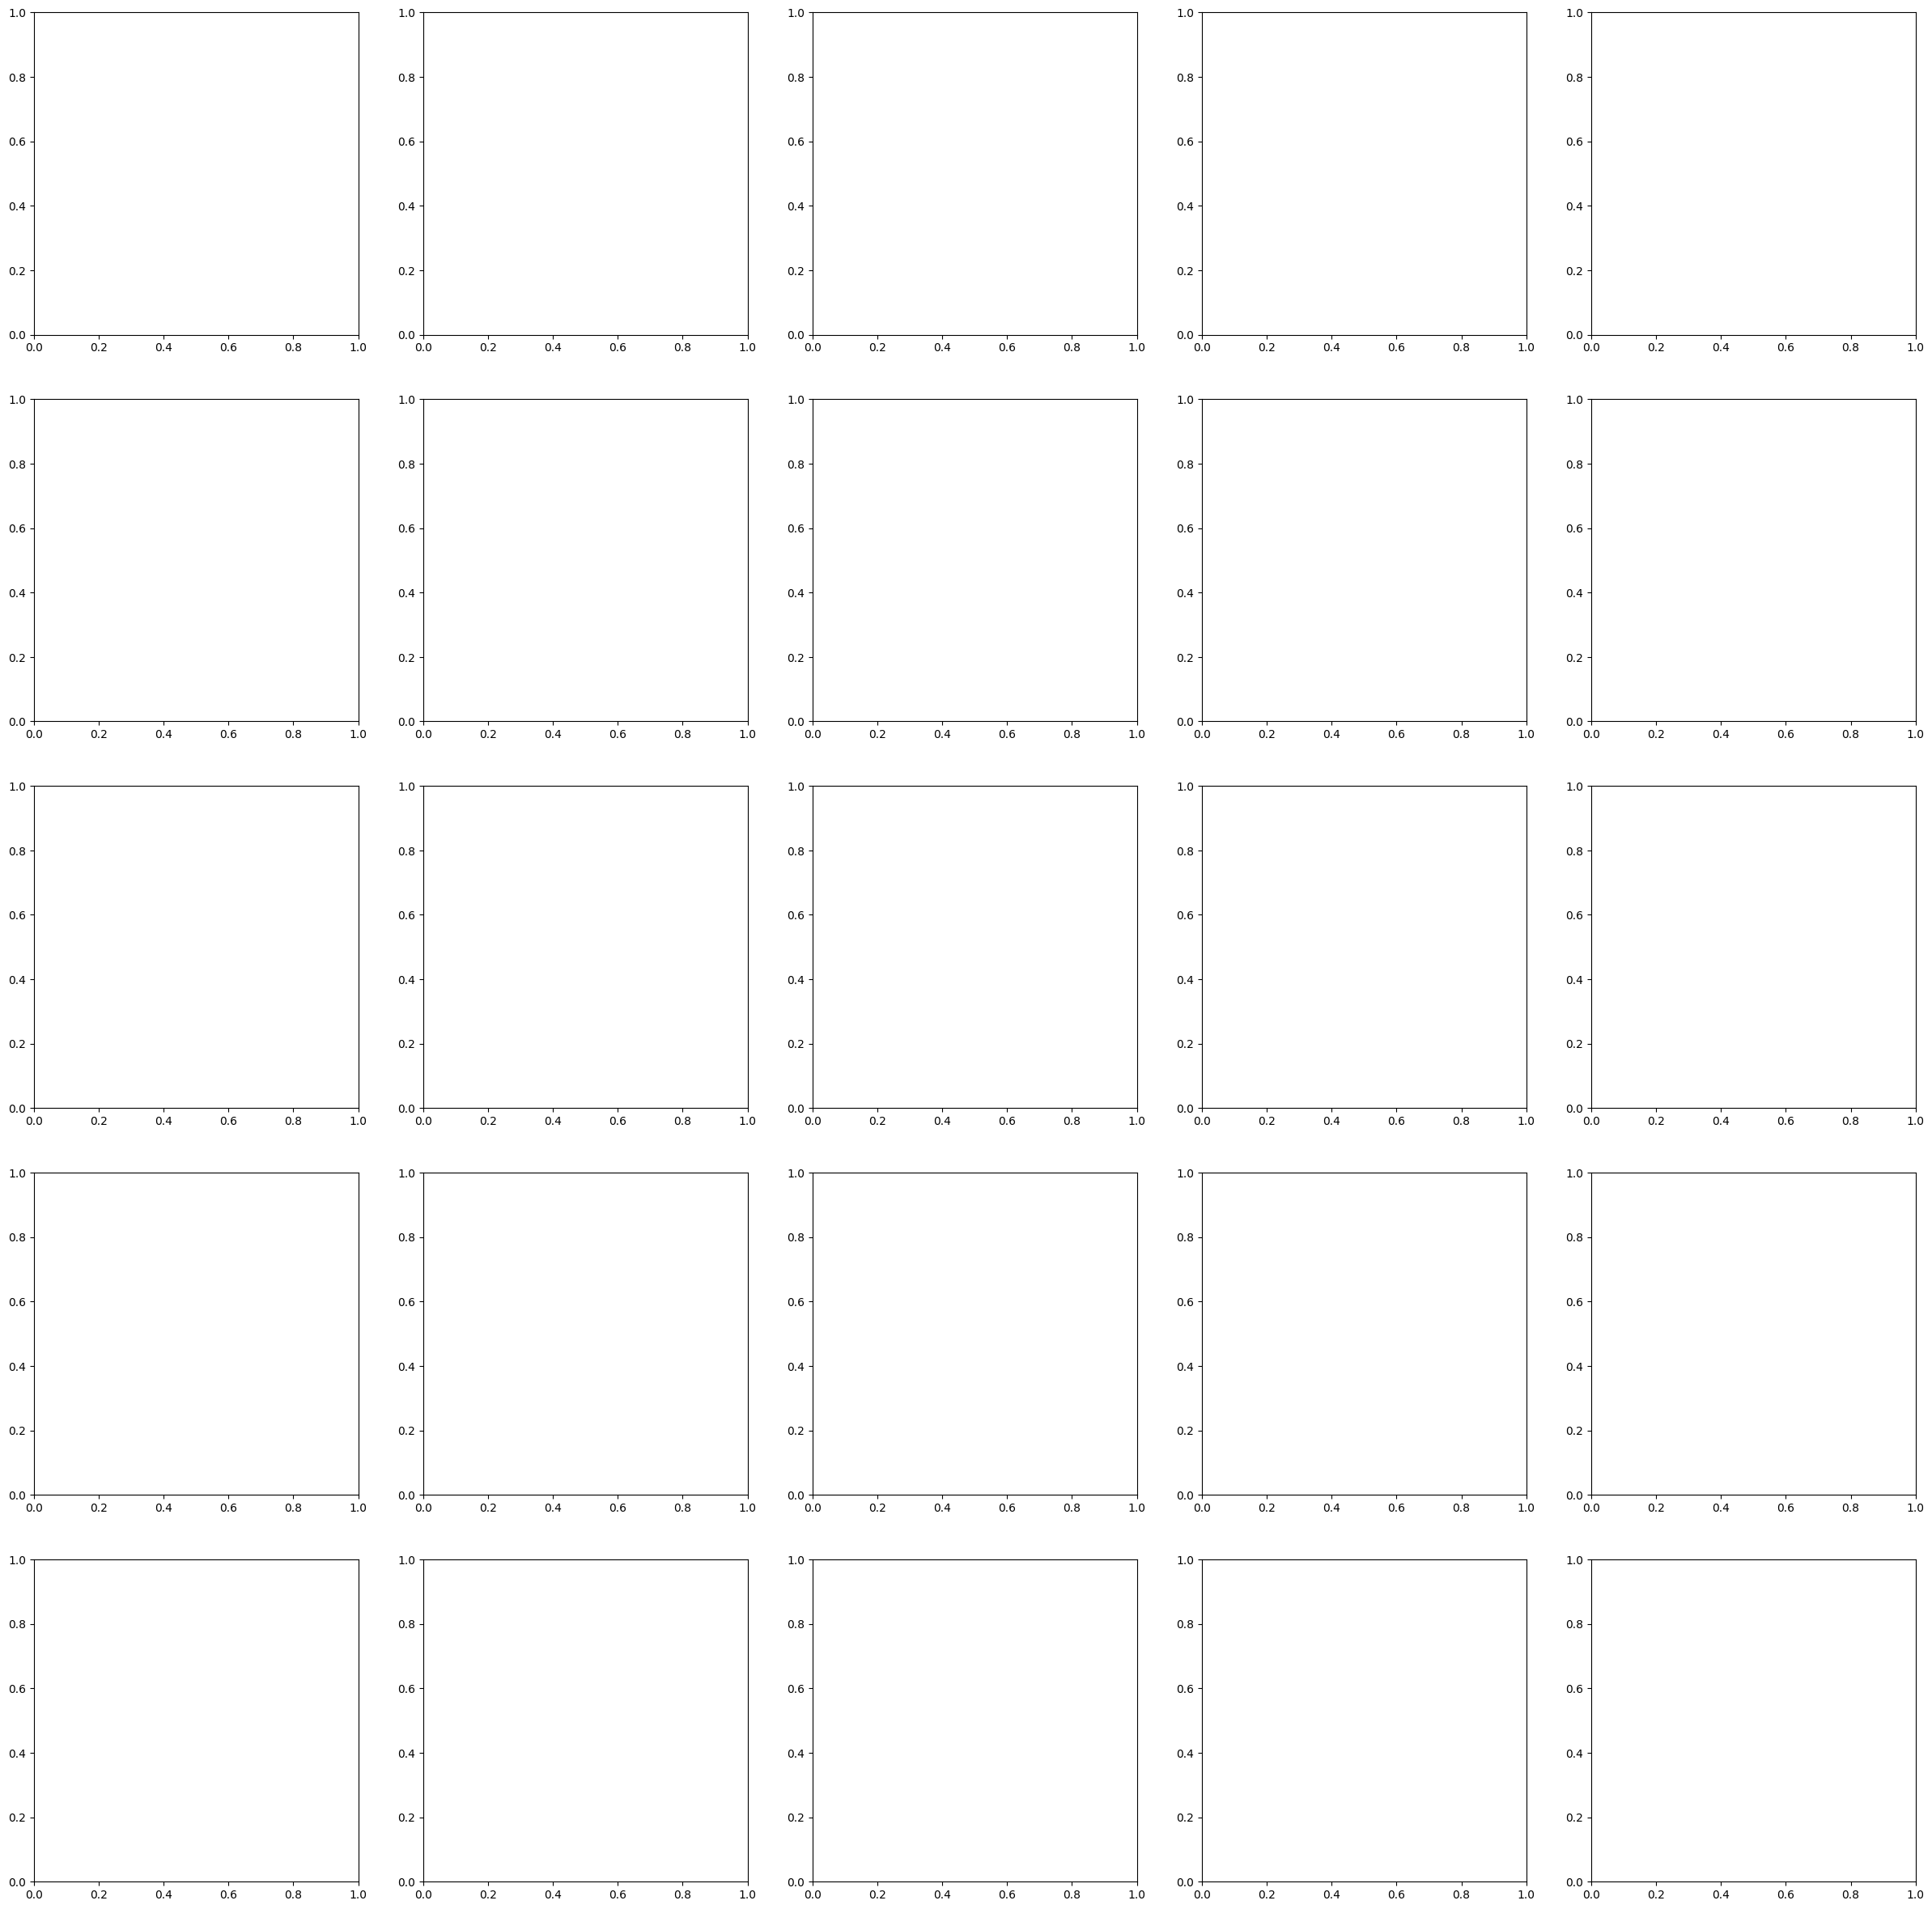

In [4]:

listClasif=list()
for x in range(0,len(list(X2[0]))):
    listClasif.append(X2[0][x])


#for x in range(0,len(X2[0])):
    #print(X2[0][x][0])
    #print(int(X2[0][x][0]))
    #print(Y2[0][x])
    #listClasif[int(X2[0][x][0])]

fig,ax = plt.subplots(5, 5, figsize = (30, 30)) 
cont=0
for x in range(0,5):
    for y in range(0,5):
#        print(len(listClasif[cont]))
        Posit = range(0,len(listClasif[cont]))
        ax[x][y].plot(Posit,listClasif[cont],label = AD().avail_models_name[int(Y2[0][cont])].upper(),c = 'C'+str(x))
        ax[x][y].legend()
        ax[x][y].set_title(f'Trajectory {x}')
#        ax.set_ylabel(str(x))
#        ax.figure()
        cont=cont+1

In [7]:
print('Task 2, dimension 1= '+str(len(X2[0])))

Task 2, dimension 1= 10000


In [87]:
#excluimos el primer valor de cada trayectoria, pues este indica el tipo de trayectoria, no es util en el procesamiento
#for x in range(0,len(X2[0])):
#    X2[0][x].pop(0)



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X2[0],Y2[0], test_size=.2, random_state=0)

X_train_re = np.array(X_train).reshape(-1, 199, 1)
y_train_cat = to_categorical(y_train, num_classes=5)
X_test_re = np.array(X_test).reshape(-1, 199, 1)
y_test_cat = to_categorical(y_test, num_classes=5)

In [6]:
print("Train X:"+str(len(X_train)))
print("Train Y:"+str(len(y_train)))
print("Test X:"+str(len(X_test)))
print("Test Y:"+str(len(y_test)))

Train X:8000
Train Y:8000
Test X:2000
Test Y:2000


In [7]:
X_trainPad = kr.preprocessing.sequence.pad_sequences(
    X_train, padding="pre",dtype='float64'
)
X_testPad = kr.preprocessing.sequence.pad_sequences(
    X_test, padding="pre",dtype='float64'
)
for x in range(0,10):
    print('Dim Trayectorioa Test:'+str(x)+' '+str(len(X_testPad[x])))
for x in range(0,10):
    print('Dim Trayectorioa Train:'+str(x)+' '+str(len(X_trainPad[x])))

Dim Trayectorioa Test:0 199
Dim Trayectorioa Test:1 199
Dim Trayectorioa Test:2 199
Dim Trayectorioa Test:3 199
Dim Trayectorioa Test:4 199
Dim Trayectorioa Test:5 199
Dim Trayectorioa Test:6 199
Dim Trayectorioa Test:7 199
Dim Trayectorioa Test:8 199
Dim Trayectorioa Test:9 199
Dim Trayectorioa Train:0 199
Dim Trayectorioa Train:1 199
Dim Trayectorioa Train:2 199
Dim Trayectorioa Train:3 199
Dim Trayectorioa Train:4 199
Dim Trayectorioa Train:5 199
Dim Trayectorioa Train:6 199
Dim Trayectorioa Train:7 199
Dim Trayectorioa Train:8 199
Dim Trayectorioa Train:9 199


In [26]:
print(y_train_cat.shape)
print(X_train_re.shape)

(8000, 5)
(8000, 199, 1)


In [136]:
X_train_re.shape

(8000, 199, 1)

In [30]:
import collections
print(collections.Counter(y_train))
y_train

Counter({0.0: 1625, 2.0: 1599, 3.0: 1599, 1.0: 1594, 4.0: 1583})


[4.0,
 2.0,
 4.0,
 0.0,
 3.0,
 1.0,
 3.0,
 2.0,
 1.0,
 3.0,
 0.0,
 2.0,
 4.0,
 2.0,
 4.0,
 1.0,
 2.0,
 4.0,
 0.0,
 4.0,
 4.0,
 3.0,
 1.0,
 2.0,
 1.0,
 4.0,
 4.0,
 4.0,
 3.0,
 3.0,
 1.0,
 0.0,
 1.0,
 3.0,
 1.0,
 2.0,
 4.0,
 1.0,
 2.0,
 0.0,
 1.0,
 4.0,
 0.0,
 1.0,
 2.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 1.0,
 3.0,
 2.0,
 1.0,
 1.0,
 0.0,
 2.0,
 3.0,
 3.0,
 0.0,
 1.0,
 1.0,
 4.0,
 1.0,
 4.0,
 3.0,
 0.0,
 4.0,
 4.0,
 3.0,
 1.0,
 1.0,
 1.0,
 0.0,
 4.0,
 4.0,
 2.0,
 1.0,
 2.0,
 0.0,
 1.0,
 4.0,
 4.0,
 4.0,
 0.0,
 1.0,
 2.0,
 4.0,
 1.0,
 2.0,
 1.0,
 0.0,
 1.0,
 1.0,
 2.0,
 0.0,
 4.0,
 2.0,
 4.0,
 1.0,
 4.0,
 0.0,
 0.0,
 4.0,
 0.0,
 3.0,
 2.0,
 0.0,
 1.0,
 3.0,
 1.0,
 3.0,
 2.0,
 0.0,
 3.0,
 2.0,
 0.0,
 2.0,
 4.0,
 1.0,
 3.0,
 2.0,
 4.0,
 4.0,
 0.0,
 4.0,
 2.0,
 4.0,
 1.0,
 4.0,
 4.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 2.0,
 3.0,
 3.0,
 3.0,
 2.0,
 0.0,
 1.0,
 1.0,
 0.0,
 2.0,
 3.0,
 0.0,
 4.0,
 3.0,
 1.0,
 0.0,
 2.0,
 0.0,
 0.0,
 1.0,
 4.0,
 0.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 1.0

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,1) ,activation='relu',input_shape=(199,1,1)))
#
model.add(Conv2D(filters=5, activation='relu',kernel_size=5,strides=1,kernel_initializer= 'uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,center=True,scale=True))
model.add(Conv2D(filters=10, activation='relu',kernel_size=5,strides=1,kernel_initializer= 'uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,center=True,scale=True))
model.add(Conv2D(filters=15, activation='relu',kernel_size=5,strides=1,kernel_initializer= 'uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,center=True,scale=True))
model.add(Conv2D(filters=20, activation='relu',kernel_size=5,strides=1,  kernel_initializer= 'uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,center=True,scale=True))

model.add(Conv2D(filters=25, activation='relu',kernel_size=5,strides=1,  kernel_initializer= 'uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,center=True,scale=True))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','acc'])

# convertir los datos en numpy array
# reshape del nump
# label Y to categorical


NameError: name 'Conv2D' is not defined

Codigo 2d chatgpt

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

model = Sequential()

# Cambiamos a Conv2D y especificamos input_shape como (height, width, channels)
model.add(Conv2D(filters=32, kernel_size=(5, 1), activation='relu', input_shape=(199, 1, 1)))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

model.add(Conv2D(filters=5, activation='relu', kernel_size=(5, 1)))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

model.add(Conv2D(filters=10, activation='relu', kernel_size=(5, 1)))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

model.add(Conv2D(filters=15, activation='relu', kernel_size=(5, 1)))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

model.add(Conv2D(filters=20, activation='relu', kernel_size=(5, 1)))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

model.add(Conv2D(filters=25, activation='sigmoid', kernel_size=(5, 1)))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

# Agregamos una capa de pooling en 2D para reducir las dimensiones
model.add(MaxPooling2D(pool_size=(2, 1)))

# Añadimos una capa de aplanado para conectar con capas densas
model.add(Flatten())

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'acc'])


corregido y mejorado por chat gpt

In [41]:
from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score
import numpy as np

# Supongamos que tienes X_train, y_train, X_test, y_test como tus datos de entrenamiento y prueba

# Calcula los pesos de clase para abordar el desbalance de clases
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

class_weight_dict = dict(enumerate(class_weights))

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(199, 1)))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

model.add(Conv1D(filters=5, activation='relu', kernel_size=5, strides=1, kernel_initializer='uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

model.add(Conv1D(filters=10, activation='relu', kernel_size=5, strides=1, kernel_initializer='uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

model.add(Conv1D(filters=15, activation='relu', kernel_size=5, strides=1, kernel_initializer='uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

model.add(Conv1D(filters=20, activation='relu', kernel_size=5, strides=1, kernel_initializer='uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

model.add(Conv1D(filters=25, activation='sigmoid', kernel_size=5, strides=1, kernel_initializer='uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

# Agrega capa de MaxPooling para reducción de dimensionalidad
model.add(MaxPooling1D(pool_size=2))

# Añade Dropout para regularización
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(5, activation='softmax'))

# Utiliza Adam como optimizador con una tasa de aprendizaje reducida
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', 'acc'])

# Entrenamiento del modelo
history = model.fit(X_train_re, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test_re, y_test_cat), class_weight=class_weight_dict)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)



# Calcular el F1-score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f'F1 Score: {f1}')


Epoch 1/50
250/250 [==============================] - 8s 25ms/step - loss: 2.0648 - accuracy: 0.2755 - acc: 0.2755 - val_loss: 1.6205 - val_accuracy: 0.1825 - val_acc: 0.1825
Epoch 2/50
250/250 [==============================] - 6s 25ms/step - loss: 1.7820 - accuracy: 0.3322 - acc: 0.3322 - val_loss: 1.6007 - val_accuracy: 0.2160 - val_acc: 0.2160
Epoch 3/50
250/250 [==============================] - 6s 24ms/step - loss: 1.5920 - accuracy: 0.3823 - acc: 0.3823 - val_loss: 2.4995 - val_accuracy: 0.2025 - val_acc: 0.2025
Epoch 4/50
250/250 [==============================] - 6s 25ms/step - loss: 1.4641 - accuracy: 0.4195 - acc: 0.4195 - val_loss: 4.8385 - val_accuracy: 0.1985 - val_acc: 0.1985
Epoch 5/50
250/250 [==============================] - 6s 25ms/step - loss: 1.3357 - accuracy: 0.4633 - acc: 0.4633 - val_loss: 7.8918 - val_accuracy: 0.2005 - val_acc: 0.2005
Epoch 6/50
250/250 [==============================] - 6s 24ms/step - loss: 1.2812 - accuracy: 0.4814 - acc: 0.4814 - val_loss

AxisError: axis 1 is out of bounds for array of dimension 1

In [10]:
history = model.fit(X_train_re, y_train_cat, epochs=100)


Epoch 1/100
250/250 [==============================] - 8s 23ms/step - loss: 1.6058 - accuracy: 0.3481 - acc: 0.3481
Epoch 2/100
250/250 [==============================] - 6s 24ms/step - loss: 1.2696 - accuracy: 0.4801 - acc: 0.4801
Epoch 3/100
250/250 [==============================] - 6s 24ms/step - loss: 1.1251 - accuracy: 0.5288 - acc: 0.5288
Epoch 4/100
250/250 [==============================] - 6s 24ms/step - loss: 1.0662 - accuracy: 0.5495 - acc: 0.5495
Epoch 5/100
250/250 [==============================] - 6s 24ms/step - loss: 1.0177 - accuracy: 0.5684 - acc: 0.5684
Epoch 6/100
250/250 [==============================] - 6s 23ms/step - loss: 0.9522 - accuracy: 0.6034 - acc: 0.6034
Epoch 7/100
250/250 [==============================] - 6s 24ms/step - loss: 0.9188 - accuracy: 0.6166 - acc: 0.6166
Epoch 8/100
250/250 [==============================] - 6s 23ms/step - loss: 0.8591 - accuracy: 0.6428 - acc: 0.6428
Epoch 9/100
250/250 [==============================] - 6s 24ms/step - lo

In [ ]:
history=model.fit(X_train_re, y_train_cat, epochs=100)

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)



acc      = history.history[     'acc' ]
#val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' ,label='Training loss')
#plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

Epoch 1/100
250/250 [==============================] - 8s 20ms/step - loss: 1.8626 - accuracy: 0.2551 - acc: 0.2551
Epoch 2/100
250/250 [==============================] - 5s 22ms/step - loss: 1.7370 - accuracy: 0.2596 - acc: 0.2596
Epoch 3/100
250/250 [==============================] - 5s 20ms/step - loss: 1.6939 - accuracy: 0.2758 - acc: 0.2758
Epoch 4/100
250/250 [==============================] - 5s 20ms/step - loss: 1.6987 - accuracy: 0.2612 - acc: 0.2612
Epoch 5/100
250/250 [==============================] - 5s 20ms/step - loss: 1.6450 - accuracy: 0.2659 - acc: 0.2659
Epoch 6/100
250/250 [==============================] - 5s 20ms/step - loss: 1.6001 - accuracy: 0.2858 - acc: 0.2858
Epoch 7/100
250/250 [==============================] - 5s 21ms/step - loss: 1.5773 - accuracy: 0.2995 - acc: 0.2995
Epoch 8/100
250/250 [==============================] - 5s 20ms/step - loss: 1.5216 - accuracy: 0.3257 - acc: 0.3257
Epoch 9/100
250/250 [==============================] - 5s 21ms/step - lo

In [770]:
#history=model.fit(X_trainPad.tolist(), y_train, epochs=100)
#print(added_inputs.tolist()[0])


Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 1.6086 - accuracy: 0.2254 - acc: 0.2254
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5993 - accuracy: 0.2421 - acc: 0.2421
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5923 - accuracy: 0.2476 - acc: 0.2476
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5903 - accuracy: 0.2503 - acc: 0.2503
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5824 - accuracy: 0.2643 - acc: 0.2643
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5809 - accuracy: 0.2629 - acc: 0.2629
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5888 - accuracy: 0.2525 - acc: 0.2525
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5834 - accuracy: 0.2675 - acc: 0.2675
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 1.581

<Figure size 640x480 with 0 Axes>

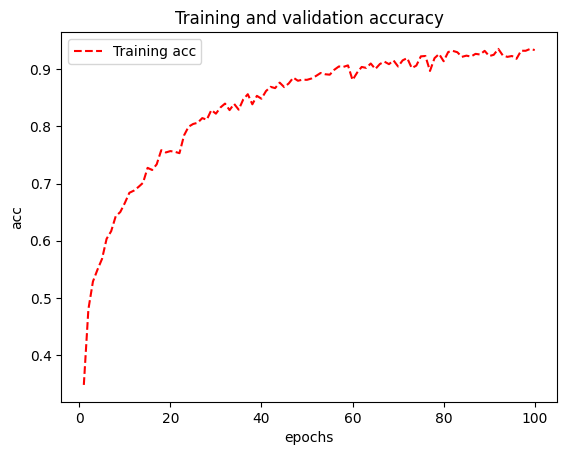

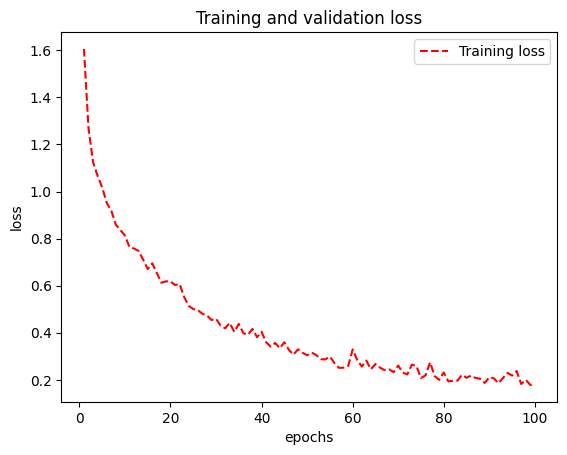

<Figure size 640x480 with 0 Axes>

In [11]:

acc      = history.history[     'acc' ]
#val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' ,label='Training loss')
#plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [12]:
y_pred = model.predict(X_test_re) 

print('accuracy: ',accuracy_score(np.array(y_test),np.argmax(y_pred, axis = 1)))
print('f1_score ',f1_score(np.array(y_test),np.argmax(y_pred, axis = 1), average='micro'))
print('Matriz de Confusion')
print(confusion_matrix(np.array(y_test),np.argmax(y_pred, axis = 1)))
#cm = confusion_matrix(y_test, y_pred)
#print (cm)

63/63 [==============================] - 1s 8ms/step
accuracy:  0.2115
f1_score  0.21149999999999997
Matriz de Confusion
[[  1 362   0   0   0]
 [  4 409   0   0   0]
 [  5 406   0   0   0]
 [  9 369   0  13   0]
 [ 10 412   0   0   0]]
